In [2]:
import pandas as pd
import numpy as np

import scipy.cluster.hierarchy as hcluster
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [5]:
! ls

'3_3 HW_Kobe.ipynb'
 data
'description (alhoritm and forecasting methods).ipynb'
'FE_3_3_1 linear lasso ridge.ipynb'
'FE_3_3_2(Dimensionality reduction).ipynb'
'FE_3_3_3 (Dimensionality reduction PCA sparse matrixes).ipynb'
'Practice_3_1 (Dimensionality reduction).ipynb'
'Проблемы качества и очистка данных 3.pdf'
'Проблемы качества и очистка данных 3.pptx'


In [33]:
#cd /home/arseny/Downloads/FE_3/FE 3/data
#cd '/home/arseny/data/3 course preprocessing and visualization/FE_3_3 (PCA Dimensionality reduction sparse matr regress)'
! cd ~/data

#cd '/home/arseny/data/course preprocessing and visualization/FE_3_3 (PCA Dimensionality reduction sparse matr regress)/FE 3'

In [4]:
#kobe_df = pd.read_csv('kobe.csv')
kobe_df = pd.read_csv('data/kobe.csv')

In [5]:
kobe_df.T.head(80)

,0,1,2,3,4,5,6,7,8,9,...,30687,30688,30689,30690,30691,30692,30693,30694,30695,30696
action_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Dunk Shot,Jump Shot,Layup Shot,Jump Shot,Jump Shot,Running Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Layup Shot,Jump Shot,Tip Shot,Running Jump Shot,Jump Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Dunk,Jump Shot,Layup,Jump Shot,Jump Shot,Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Layup,Jump Shot,Tip Shot,Jump Shot,Jump Shot,Jump Shot
game_event_id,10,12,35,43,155,244,251,254,265,294,...,284,308,326,331,382,397,398,426,448,471
game_id,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,...,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088
lat,33.9723,34.0443,33.9093,33.8693,34.0443,34.0553,34.0443,34.0163,33.9363,33.9193,...,33.9443,33.9833,33.3653,33.9443,34.0443,33.9963,34.0443,33.8783,33.7773,33.9723
loc_x,167,-157,-101,138,0,-145,0,1,-65,-33,...,40,-126,-12,-113,0,1,0,-134,31,1
loc_y,72,0,135,175,0,-11,0,28,108,125,...,100,61,679,100,0,48,0,166,267,72
lon,-118.103,-118.427,-118.371,-118.132,-118.27,-118.415,-118.27,-118.269,-118.335,-118.303,...,-118.23,-118.396,-118.282,-118.383,-118.27,-118.269,-118.27,-118.404,-118.239,-118.269
minutes_remaining,10,10,7,6,6,9,8,8,6,3,...,3,1,0,11,7,6,6,3,2,0
period,1,1,1,1,2,3,3,3,3,3,...,3,3,3,4,4,4,4,4,4,4


In [6]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

# 1. Провести анализ данных. 
Много хороших примеров анализа можно посмотреть здесь 
https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels

In [9]:
kobe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [10]:
#data['action_type'].unique()
kobe_df.groupby(['action_type'])['shot_id'].count().reset_index().sort_values(by='shot_id', ascending=False)
#combined_shot_type: "Jump Shot", "Layup", "Dunk"

,action_type,shot_id
26,Jump Shot,18880
27,Layup Shot,2567
12,Driving Layup Shot,1978
56,Turnaround Jump Shot,1057
17,Fadeaway Jump Shot,1048
41,Running Jump Shot,926
29,Pullup Jump shot,476
53,Turnaround Fadeaway shot,439
47,Slam Dunk Shot,411
34,Reverse Layup Shot,395


In [ ]:
'''
action_type           30697 non-null object
combined_shot_type    30697 non-null object
season                30697 non-null object
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_name             30697 non-null object
game_date             30697 non-null object
matchup               30697 non-null object
opponent              30697 non-null object

game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
team_id               30697 non-null int64
shot_id               30697 non-null int64   '''

In [ ]:
#поскольку пропущенные значения есть в оцениваемой переменной 'shot_made_flag', отбрасываем такие строки, 
#т.к. вся эта оставшаяся информация не нужна для предсказания

In [7]:
kobe_df.dropna(inplace=True)

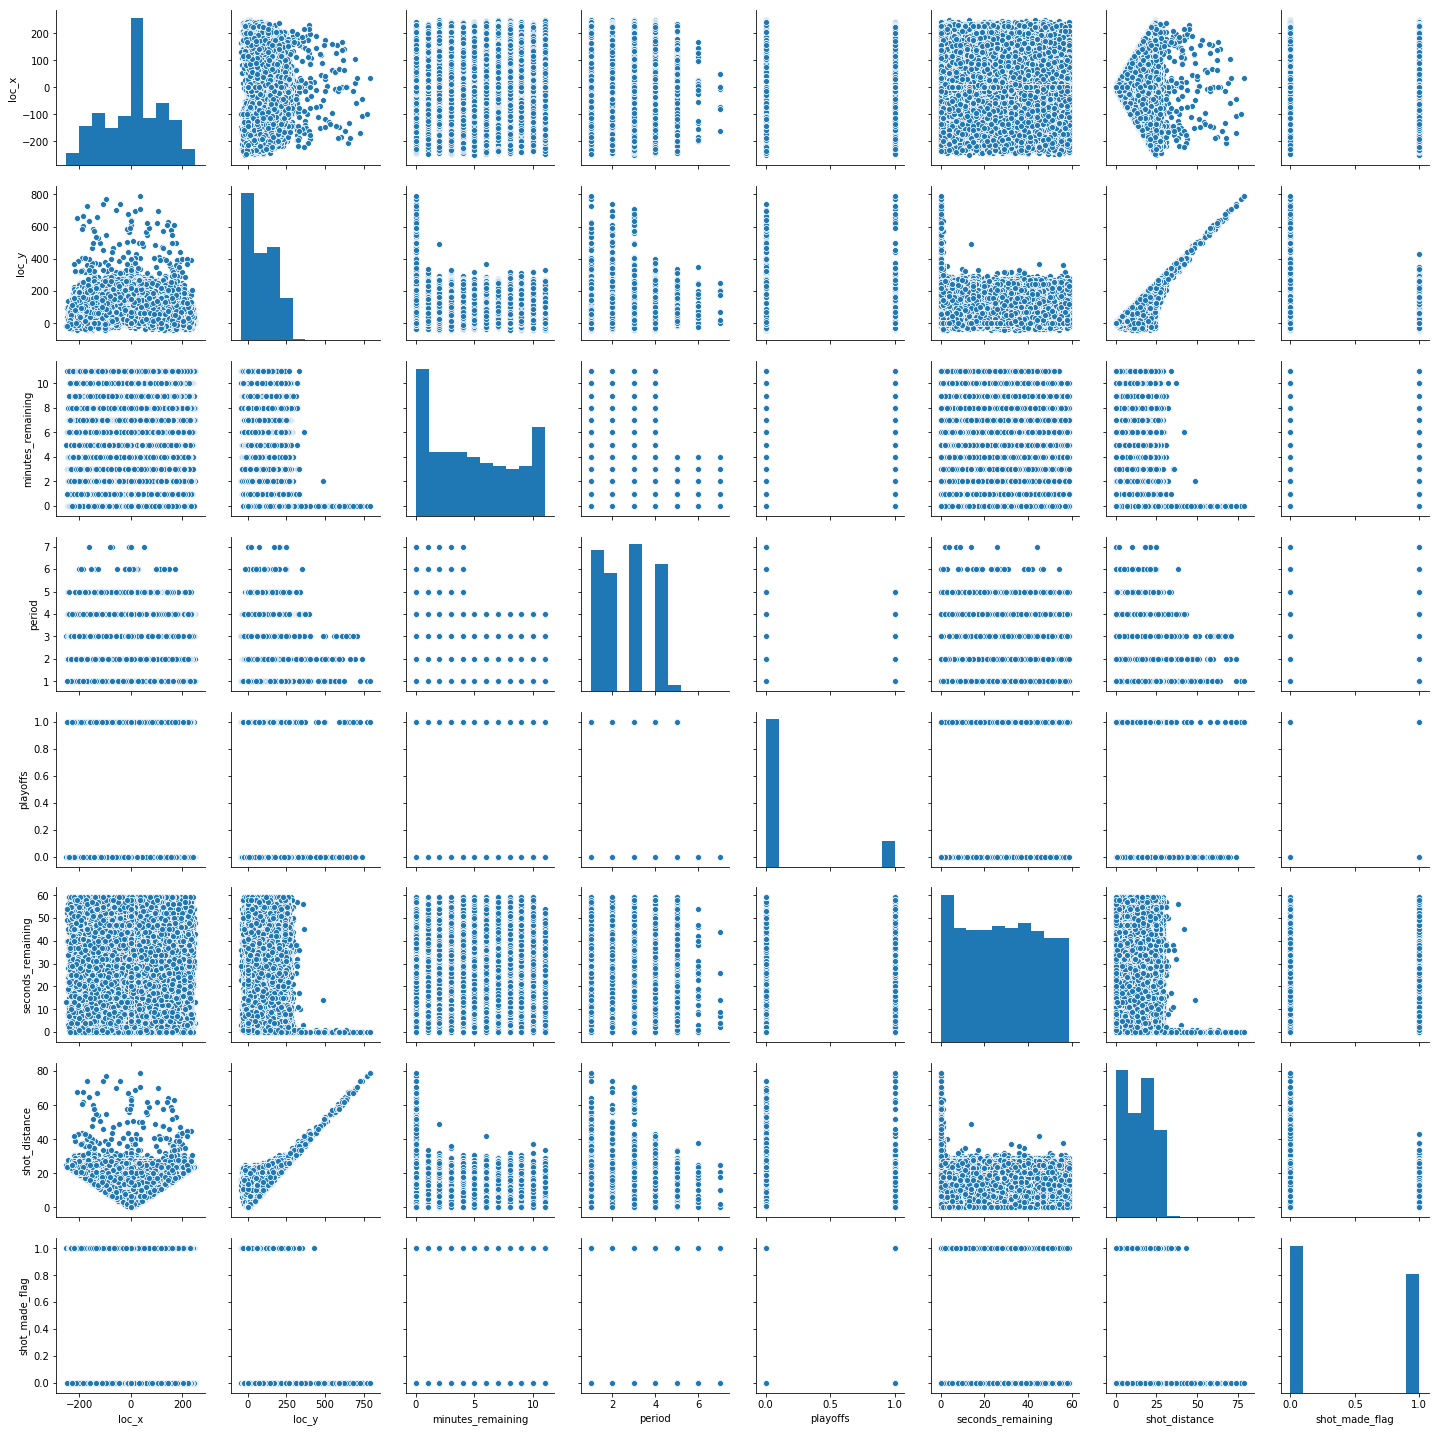

In [12]:
#рисуем числовые переменные 
sns.pairplot(kobe_df, vars=[#'game_event_id', 'game_id', 'lat', 'lon',
                            'loc_x', 'loc_y',  'minutes_remaining', \
                                'period', 'playoffs', 'seconds_remaining', 'shot_distance', \
                                'shot_made_flag', \
                                #'team_id', 'shot_id'\
                            ],
                 kind='scatter', dropna=True)

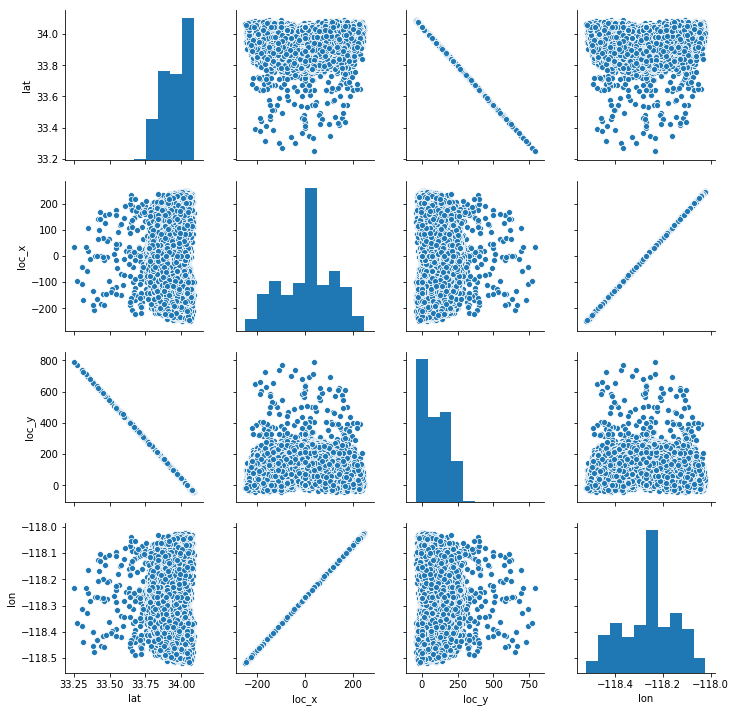

In [13]:
sns.pairplot(kobe_df, vars=['lat', 'loc_x', 'loc_y', 'lon'],
                 kind='scatter',dropna=True)


In [ ]:
#lat, lon можно выбросить. Т.к. они повторяют loc_x, loc_y

In [8]:
kobe_df.drop(columns=['lat', 'lon'], inplace=True)

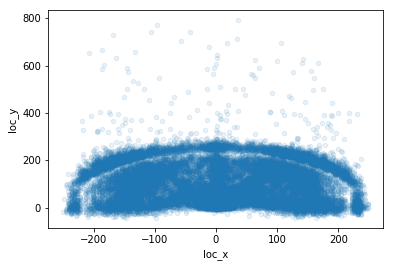

In [46]:
_ = kobe_df.plot(kind="scatter", x="loc_x", y="loc_y", alpha=0.1)

In [ ]:
#видны очертания площадки. C линии не бросает

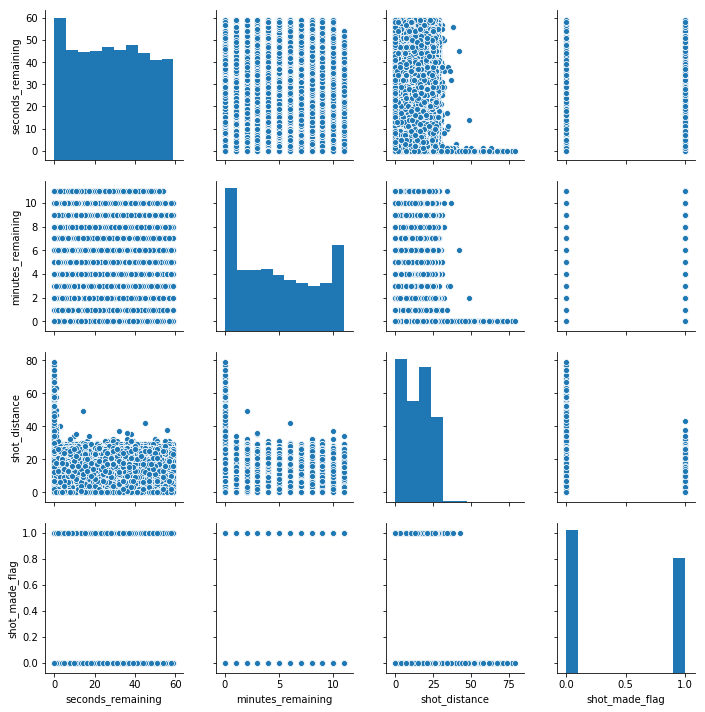

In [15]:
sns.pairplot(kobe_df, vars=['seconds_remaining', 'minutes_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)


In [ ]:
# в последнеюю минуту и на последних секундах  склонен бросать и бросать издалека

# 2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.

In [ ]:
#пропущеные значения уже отброшены в предыдущем пункте

In [9]:
#kobe_df.drop(columns=['true_seconds_remaining'], inplace=True)
kobe_df['true_seconds_remaining']=kobe_df['seconds_remaining']+kobe_df['minutes_remaining']*60

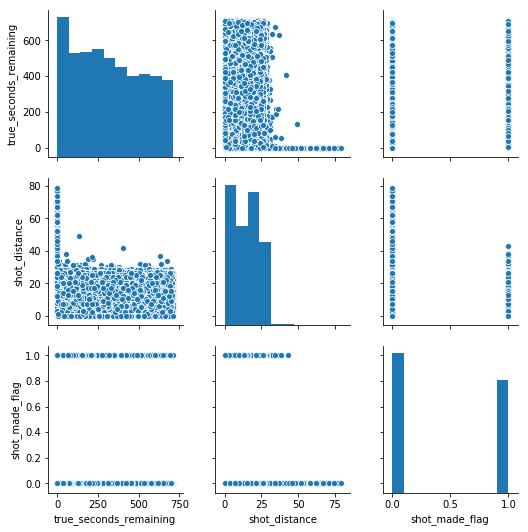

In [38]:
sns.pairplot(kobe_df, vars=['true_seconds_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)

In [10]:
kobe_df = kobe_df.astype({"true_seconds_remaining": int})

In [11]:
kobe_df['20_s_interv_remain']=(kobe_df['true_seconds_remaining'])//20

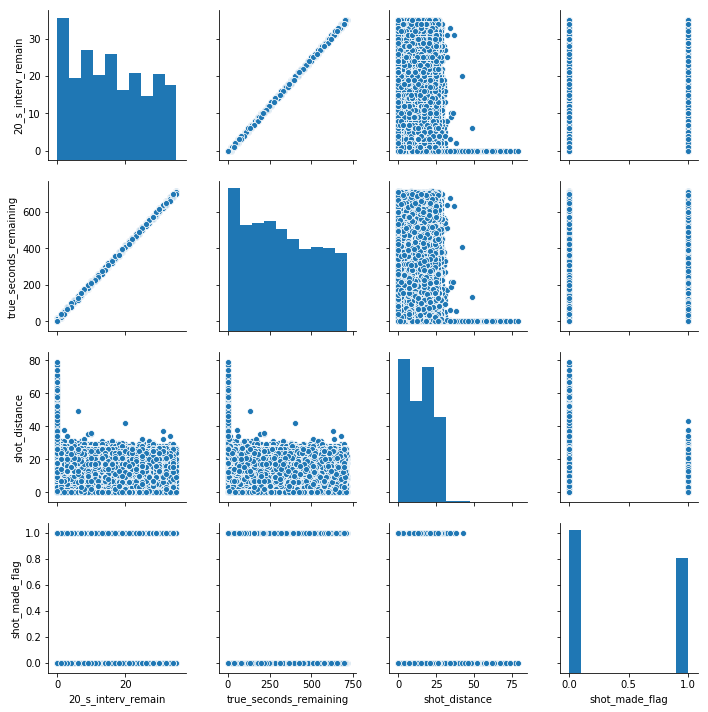

In [59]:
sns.pairplot(kobe_df, vars=['20_s_interv_remain', 'true_seconds_remaining', 'shot_distance', 'shot_made_flag'],
                 kind='scatter',dropna=True)

In [65]:
#accuracy_by_interval=kobe_df.groupby(['20_s_interv_remain'])['shot_made_flag'].mean().reset_index().sort_values(by='20_s_interv_remain', ascending=False)

In [12]:
accuracy_by_interval=kobe_df.groupby('20_s_interv_remain').agg({'shot_made_flag':'mean','shot_id':'count'}).reset_index()

In [13]:
accuracy_by_interval['shot_id']=accuracy_by_interval['shot_id']/accuracy_by_interval['shot_id'].sum()
accuracy_by_interval.rename(index=str, columns={"shot_id": "nmb_of_shots", "shot_made_flag": "accuracy"}, inplace=True)

In [21]:
accuracy_by_interval

,20_s_interv_remain,accuracy,nmb_of_shots
0,0,0.313081,0.054442
1,1,0.406312,0.039460
2,2,0.462275,0.032494
3,3,0.472258,0.030159
4,4,0.419397,0.029692
5,5,0.449728,0.028641
6,6,0.435096,0.032377
7,7,0.480620,0.030120
8,8,0.426908,0.030081
9,9,0.455369,0.030081


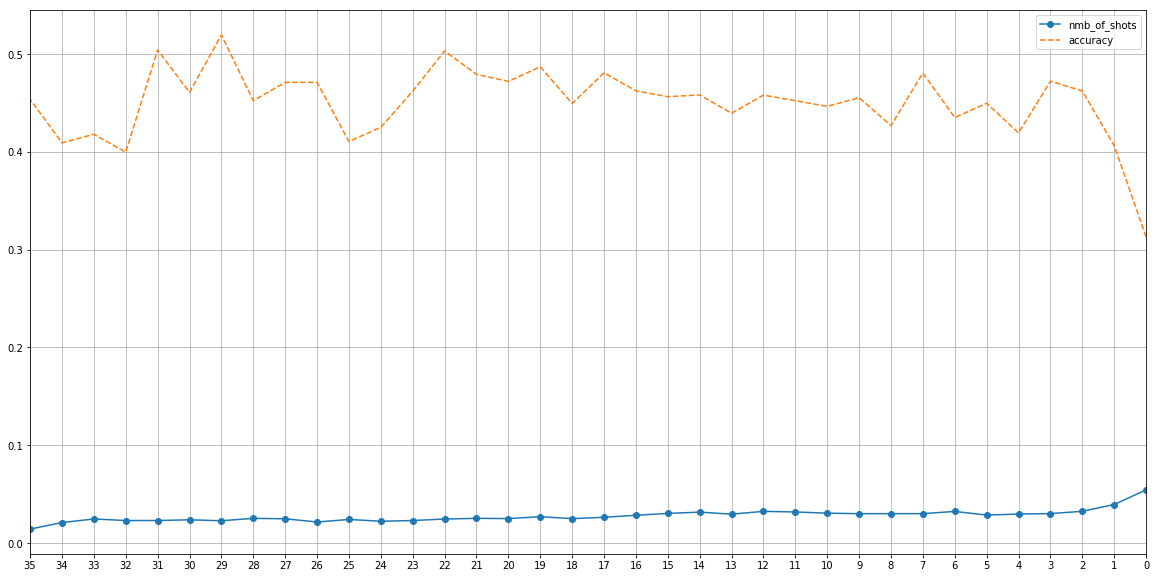

In [86]:
plt.figure(figsize=(20,10))
x=accuracy_by_interval['20_s_interv_remain']
y=accuracy_by_interval['nmb_of_shots']
z=accuracy_by_interval['accuracy']

#accuracy_by_interval.plot('20_s_interv_remain', 'nmb_of_shots');
#accuracy_by_interval.plot('accuracy');

plt.plot(x, y, marker='o')
plt.plot(z, linestyle='dashed')
# инвертирование оси Х
plt.xlim(35, 0)

plt.grid(True)

plt.legend()

In [ ]:
# при бросках в последние 40 секунд каждой четверти точность снижаетеся

In [14]:
def get_woe_v1(df_train, df_test, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test

In [15]:
def get_woe_stat(df_train, col, target_col):
    stat = df_train.groupby(col)[target].agg(
        [np.mean, np.size, np.count_nonzero], sort=False
    )
    stat.rename(columns={'count_nonzero': 'good', 'size': 'obs', 'mean': 'event_rate'}, inplace=True)
    stat['all_good'] = stat['good'].sum()
    stat['p_good'] = stat['good'] / stat['all_good']
    stat['bad'] = stat['obs'] - stat['good']
    stat['all_bad'] = stat['bad'].sum()
    stat['p_bad'] = stat['bad'] / stat['all_bad']
    stat['WOE']=np.log(stat['p_good'] / stat['p_bad'])
    stat['IV'] = ((stat['p_good'] - stat['p_bad']) * stat['WOE']).sum()
    stat['variable'] = col
    stat['category'] = stat.index
    stat.reset_index(inplace=True)
    stat.drop(labels=col, inplace=True, axis=1)
    return stat

In [16]:
def get_counts(df_train, df_test, col, target_col):
    category_val_dict = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[col].value_counts()
    ).to_dict()
    df_train[col + '_counts'] = df_train[col].apply(category_val_dict.get)
    df_test[col + '_counts'] = df_test[col].apply(category_val_dict.get)
    return df_train, df_test

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
y= kobe_df['shot_made_flag'].copy()
data_train, data_test, y_train, y_test = train_test_split(kobe_df, y, test_size=0.2, random_state=42)

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
columns_to_get_woe = [
    'action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 
'shot_zone_basic', 'shot_zone_range', 'team_name',  'game_date', 'matchup', 'opponent',
]
    
for col_get_prob in columns_to_get_woe:
    data_train, data_test = get_woe_v1(data_train, data_test, col_get_prob, 'shot_made_flag')

/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [129]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
game_event_id,20402.0,2.497770e+02,1.495578e+02,2.000000e+00,1.120000e+02,2.550000e+02,3.670000e+02,6.530000e+02
game_id,20402.0,2.474628e+07,7.773396e+06,2.000001e+07,2.050004e+07,2.090034e+07,2.150123e+07,4.990009e+07
loc_x,20402.0,6.660278e+00,1.098115e+02,-2.500000e+02,-6.700000e+01,0.000000e+00,9.400000e+01,2.480000e+02
loc_y,20402.0,9.156053e+01,8.834901e+01,-4.300000e+01,4.000000e+00,7.400000e+01,1.600000e+02,7.910000e+02
minutes_remaining,20402.0,4.880453e+00,3.451609e+00,0.000000e+00,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
period,20402.0,2.523037e+00,1.149091e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
playoffs,20402.0,1.489070e-01,3.560055e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
seconds_remaining,20402.0,2.826243e+01,1.753527e+01,0.000000e+00,1.300000e+01,2.800000e+01,4.300000e+01,5.900000e+01
shot_distance,20402.0,1.344844e+01,9.416594e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.100000e+01,7.900000e+01
shot_made_flag,20402.0,4.488285e-01,4.973868e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [19]:
kobe_df.drop(columns=['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 
'shot_zone_basic', 'shot_zone_range', 'team_name',  'game_date', 'matchup', 'opponent'], inplace=True)

In [20]:
data_train.drop(columns=['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 
'shot_zone_basic', 'shot_zone_range', 'team_name',  'game_date', 'matchup', 'opponent'], inplace=True)

/home/arseny/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
data_test.drop(columns=['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 
'shot_zone_basic', 'shot_zone_range', 'team_name',  'game_date', 'matchup', 'opponent'], inplace=True)

/home/arseny/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
data_test.info().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5140 entries, 24546 to 11417
Data columns (total 25 columns):
game_event_id             5140 non-null int64
game_id                   5140 non-null int64
loc_x                     5140 non-null int64
loc_y                     5140 non-null int64
minutes_remaining         5140 non-null int64
period                    5140 non-null int64
playoffs                  5140 non-null int64
seconds_remaining         5140 non-null int64
shot_distance             5140 non-null int64
shot_made_flag            5140 non-null float64
team_id                   5140 non-null int64
shot_id                   5140 non-null int64
true_seconds_remaining    5140 non-null int64
20_s_interv_remain        5140 non-null int64
action_type_woe           5132 non-null float64
combined_shot_type_woe    5140 non-null float64
season_woe                5140 non-null float64
shot_type_woe             5140 non-null float64
shot_zone_area_woe        5140 non-null float64
sh

AttributeError: 'NoneType' object has no attribute 'T'

In [24]:
kobe_df.dropna(inplace=True)
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)


/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/arseny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
#Почему-то не перезаписывает отшкалированный датафрейм ни с True ни с False
scaler.fit_transform(data_train)
scaler.transform(data_test)
#data_train=scaler.fit_transform(data_train)
#data_test=scaler.transform(data_test)
#MinMaxScaler(copy=False, feature_range=(0, 1))

data_train_sc=pd.DataFrame(scaler.fit_transform(data_train),columns=['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'team_id', 'shot_id', 'true_seconds_remaining',
       '20_s_interv_remain', 'action_type_woe', 'combined_shot_type_woe',
       'season_woe', 'shot_type_woe', 'shot_zone_area_woe',
       'shot_zone_basic_woe', 'shot_zone_range_woe', 'team_name_woe',
       'game_date_woe', 'matchup_woe', 'opponent_woe'])

data_test_sc=pd.DataFrame(scaler.transform(data_test),columns=['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'team_id', 'shot_id', 'true_seconds_remaining',
       '20_s_interv_remain', 'action_type_woe', 'combined_shot_type_woe',
       'season_woe', 'shot_type_woe', 'shot_zone_area_woe',
       'shot_zone_basic_woe', 'shot_zone_range_woe', 'team_name_woe',
       'game_date_woe', 'matchup_woe', 'opponent_woe'])

In [26]:
data_train_sc.columns

Index(['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'team_id', 'shot_id', 'true_seconds_remaining',
       '20_s_interv_remain', 'action_type_woe', 'combined_shot_type_woe',
       'season_woe', 'shot_type_woe', 'shot_zone_area_woe',
       'shot_zone_basic_woe', 'shot_zone_range_woe', 'team_name_woe',
       'game_date_woe', 'matchup_woe', 'opponent_woe'],
      dtype='object')

In [27]:
data_train_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
game_event_id,20402.0,0.380610,0.229736,0.0,0.168971,0.388633,0.560676,1.0
game_id,20402.0,0.158738,0.259979,0.0,0.016723,0.030111,0.050208,1.0
loc_x,20402.0,0.515382,0.220505,0.0,0.367470,0.502008,0.690763,1.0
loc_y,20402.0,0.161344,0.105934,0.0,0.056355,0.140288,0.243405,1.0
minutes_remaining,20402.0,0.443678,0.313783,0.0,0.181818,0.454545,0.727273,1.0
period,20402.0,0.253839,0.191515,0.0,0.000000,0.333333,0.333333,1.0
playoffs,20402.0,0.148907,0.356005,0.0,0.000000,0.000000,0.000000,1.0
seconds_remaining,20402.0,0.479024,0.297208,0.0,0.220339,0.474576,0.728814,1.0
shot_distance,20402.0,0.170233,0.119197,0.0,0.063291,0.189873,0.265823,1.0
shot_made_flag,20402.0,0.448829,0.497387,0.0,0.000000,0.000000,1.000000,1.0


<Figure size 1440x720 with 0 Axes>

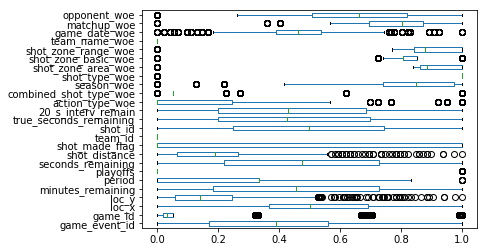

In [47]:
plt.figure(figsize=(20,10))
#data_train_sc.boxplot()
data_train_sc.plot.box(vert=False)

In [ ]:
#выбросов хватает

In [28]:
corr=data_train_sc.corr()
corr['shot_made_flag']

game_event_id            -0.037869
game_id                  -0.006147
loc_x                    -0.001432
loc_y                    -0.150000
minutes_remaining         0.032369
period                   -0.030827
playoffs                 -0.003195
seconds_remaining         0.032422
shot_distance            -0.199539
shot_made_flag            1.000000
team_id                        NaN
shot_id                  -0.017864
true_seconds_remaining    0.034919
20_s_interv_remain        0.033858
action_type_woe           0.362699
combined_shot_type_woe    0.241772
season_woe                0.048249
shot_type_woe             0.123593
shot_zone_area_woe        0.139906
shot_zone_basic_woe       0.204272
shot_zone_range_woe       0.181277
team_name_woe                  NaN
game_date_woe             0.262080
matchup_woe               0.058575
opponent_woe              0.039135
Name: shot_made_flag, dtype: float64

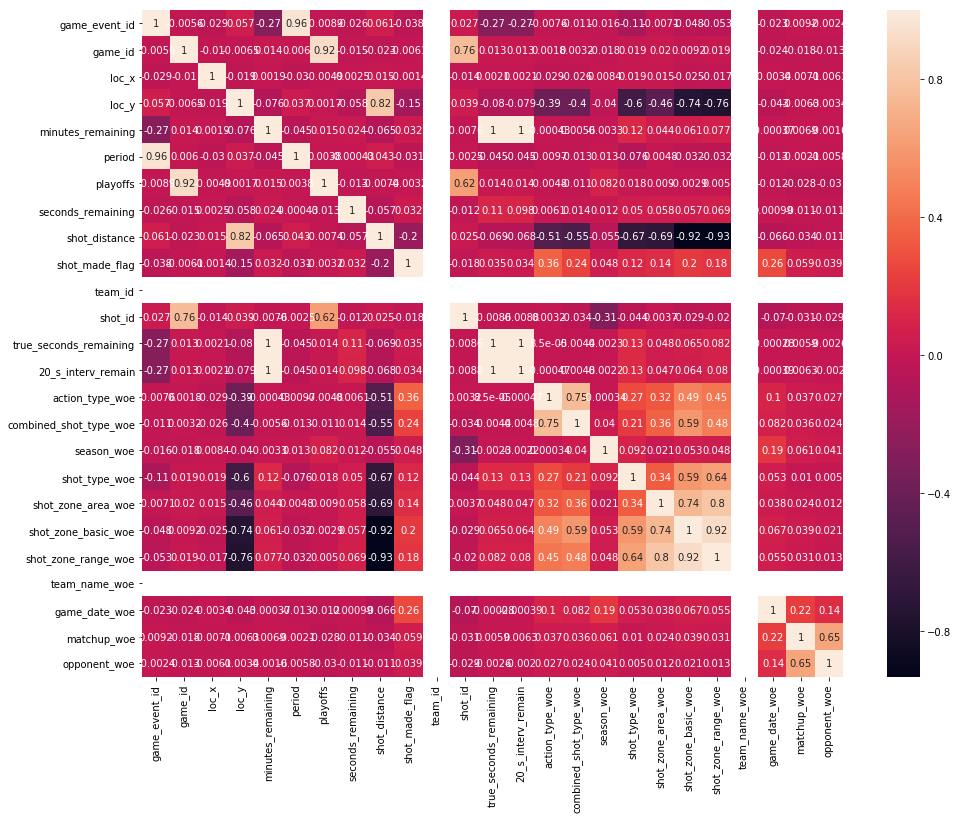

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15.7, 12.27) )        # Sample figsize in inches

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


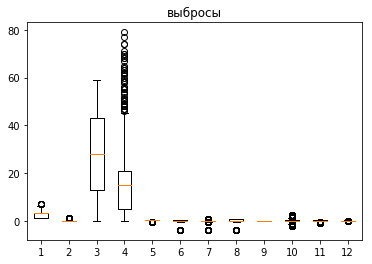

In [110]:
#коррелируют
1 'game_event_id', 'period', #'game_event_id'
2 'minutes_remaining', 'true_seconds_remaining', '20_s_interv_remain', # true_seconds_remaining
3 'playoffs', 'game_id', # 'game_id'
4. 'shot_zone_basic_woe', 'shot_zone_range_woe', 'shot_zone_area_woe', 'shot_distance', 'loc_y', #shot_zone_basic_woe
5. 'matchup_woe', 'opponent_woe' #'matchup_woe'
6. 'action_type_woe', 'combined_shot_type_woe', #'action_type_woe'
'loc_x',  
        'seconds_remaining', 
       'shot_made_flag', 'shot_id', 
       
       'season_woe', 'shot_type_woe', 
       'game_date_woe', 
#remove 
'team_name_woe', 'team_id', 

In [48]:
#plt.figure(figsize=(20,10))
#data_train.plot.box(vert=False)

# 3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

In [29]:
data_train_sc.head().T

,0,1,2,3,4
game_event_id,0.542243,0.440860,0.354839,0.425499,0.592934
game_id,0.013387,0.000028,0.003369,0.678941,0.324422
loc_x,0.502008,0.504016,0.126506,0.881526,0.556225
loc_y,0.051559,0.160671,0.071942,0.069544,0.194245
minutes_remaining,1.000000,0.727273,1.000000,0.454545,0.000000
period,0.500000,0.333333,0.333333,0.333333,0.333333
playoffs,0.000000,0.000000,0.000000,1.000000,0.000000
seconds_remaining,0.406780,0.016949,0.084746,0.728814,0.033898
shot_distance,0.000000,0.113924,0.227848,0.227848,0.151899
shot_made_flag,1.000000,0.000000,0.000000,1.000000,0.000000


In [30]:
tmp=data_train_sc.columns

In [31]:
all_columns=[]
#predictors=[]
for i in range(len(data_train_sc.columns)):
    if tmp[i]!='shot_made_flag':
        all_columns.append(tmp[i])
print(all_columns)

['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs', 'seconds_remaining', 'shot_distance', 'team_id', 'shot_id', 'true_seconds_remaining', '20_s_interv_remain', 'action_type_woe', 'combined_shot_type_woe', 'season_woe', 'shot_type_woe', 'shot_zone_area_woe', 'shot_zone_basic_woe', 'shot_zone_range_woe', 'team_name_woe', 'game_date_woe', 'matchup_woe', 'opponent_woe']


In [32]:
#Exclude features with correlation 
predictors=['game_event_id', 'true_seconds_remaining', 'game_id', 'shot_zone_basic_woe',
'matchup_woe', 'loc_x',  
        'seconds_remaining', 
       'shot_id', 
       'action_type_woe', #'combined_shot_type_woe',
       'season_woe', 'shot_type_woe', 
       'game_date_woe']


In [33]:
all_columns.index('game_date_woe')

21

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

#linreg = LinearRegression(fit_intercept=True,n_jobs=40)
linreg = LinearRegression(normalize=True,n_jobs=40)
linreg.fit(data_train_sc[predictors], data_train_sc['shot_made_flag'])
y_pred_tr = linreg.predict(data_train_sc[predictors])
y_pred_te = linreg.predict(data_test_sc[predictors])
y_train=data_train_sc['shot_made_flag']
y_test=data_test_sc['shot_made_flag']
rss_tr = sum((y_pred_tr - y_train) ** 2)
rss_te=sum((y_pred_te - y_test) ** 2)

#y_train, y_test

In [36]:
#linreg.coef_[22]
print(rss_tr/len(y_train), rss_te/len(y_test))
print(len(y_train), len(y_test))
print(linreg.coef_,linreg.intercept_)

0.20143342249797638 0.22945678349665516
20402 5078
[-0.046022    0.04230401 -0.00792922  0.10160593 -0.01577968  0.01923715
  0.04269096  0.00609356  0.78096871  0.010763    0.00283032  0.91404914] -0.18613530085394775


In [37]:
#Initialize a dataframe to store the results:
col = ['model','rss_tr', 'rss_te', 'roc_auc_tr', 'roc_auc_te','intercept'] + ['coefx_%s' % i for i in all_columns]

#ind = ['model_pow_%d' % i for i in range(1, 16)]
ind = [i for i in range(17)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [193]:
col.index('coefx_'+'game_date_woe')
len(col)
col

['model',
 'rss_tr',
 'rss_te',
 'roc_auc_tr',
 'roc_auc_te',
 'intercept',
 'coefx_game_event_id',
 'coefx_game_id',
 'coefx_loc_x',
 'coefx_loc_y',
 'coefx_minutes_remaining',
 'coefx_period',
 'coefx_playoffs',
 'coefx_seconds_remaining',
 'coefx_shot_distance',
 'coefx_team_id',
 'coefx_shot_id',
 'coefx_true_seconds_remaining',
 'coefx_20_s_interv_remain',
 'coefx_action_type_woe',
 'coefx_combined_shot_type_woe',
 'coefx_season_woe',
 'coefx_shot_type_woe',
 'coefx_shot_zone_area_woe',
 'coefx_shot_zone_basic_woe',
 'coefx_shot_zone_range_woe',
 'coefx_team_name_woe',
 'coefx_game_date_woe',
 'coefx_matchup_woe',
 'coefx_opponent_woe']

In [38]:
coef_matrix_simple.iloc[0, 0 ]='linear'
coef_matrix_simple.iloc[0, 1 ]=rss_tr
coef_matrix_simple.iloc[0, 2 ]=rss_te
coef_matrix_simple.iloc[0, 3 ]=roc_auc_score(y_train, y_pred_tr)
coef_matrix_simple.iloc[0, 4 ]=roc_auc_score(y_test, y_pred_te)
coef_matrix_simple.iloc[0, 5 ]=linreg.intercept_
#for i in range(len(predictors)):
for i in range(len(predictors)):
    #coef_matrix_simple.iloc[i - 1, 0:i + 2] = linreg.coef_[i]
    coef_matrix_simple.iloc[0, col.index('coefx_'+predictors[i])] = linreg.coef_[i]
    #print(linreg.coef_[i])
    #print('coefx_'+predictors[i])

In [39]:
#coef_matrix_simple.fillna(0,inplace=True)
coef_matrix_simple

,model,rss_tr,rss_te,roc_auc_tr,roc_auc_te,intercept,coefx_game_event_id,coefx_game_id,coefx_loc_x,coefx_loc_y,...,coefx_combined_shot_type_woe,coefx_season_woe,coefx_shot_type_woe,coefx_shot_zone_area_woe,coefx_shot_zone_basic_woe,coefx_shot_zone_range_woe,coefx_team_name_woe,coefx_game_date_woe,coefx_matchup_woe,coefx_opponent_woe
0,linear,4109.64,1165.18,0.747629,0.648678,-0.186135,-0.046022,-0.00792922,0.0192371,NaN,...,NaN,0.010763,0.00283032,NaN,0.101606,NaN,NaN,0.914049,-0.0157797,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
coef_matrix_simple.shape

(1, 30)

In [40]:
#lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score


In [41]:

def lasso_regression(X, Y, X_t, Y_t, alpha):
    # fit
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    lassoreg.fit(X, Y)
    y_pred_tr = lassoreg.predict(X)
    y_pred_te = lassoreg.predict(X_t)
    
    rss_tr = sum((y_pred_tr - y_train) ** 2)
    ret = [rss_tr]
    ret.append(sum((y_pred_te - y_test) ** 2))
    
    ret.append(roc_auc_score(y_train, y_pred_tr))
    ret.append(roc_auc_score(y_test, y_pred_te))
    
    ret.append(lassoreg.intercept_)
    for s in range(len(lassoreg.coef_)):
        ret.append(lassoreg.coef_[s])
    
    return ret

In [42]:
alpha_lasso = [1e-8,1e-7, 1e-6, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1]

In [43]:
len(['lasso_alpha_%s'+str(alpha_lasso[-0])]+\
          lasso_regression(data_train_sc[all_columns], y_train, \
                            data_test_sc[all_columns], y_test, alpha_lasso[-0]))
#len(lasso_regression(data_train_sc[all_columns], y_train, data_test_sc[all_columns], y_test, alpha_lasso[-0]))

30

In [44]:
for i in range(8):
    #coef_matrix_simple.iloc[1, 0]='la'#'lasso_alpha'+str(alpha_lasso[i])
    coef_matrix_simple.iloc[i+1,]=(['lasso_alpha_%s'+str(alpha_lasso[i])]+\
          lasso_regression(data_train_sc[all_columns], y_train, \
                            data_test_sc[all_columns], y_test, alpha_lasso[i]))

    #%s' % i 
    #coef_matrix_simple.iloc[i+1, 1:] = lasso_regression(data_train_sc[all_columns], y_train, data_test_sc[all_columns], y_test, alpha_lasso[i])
    
    #print(lasso_regression(data_train_sc[all_columns], y_train, data_test_sc[all_columns], y_test, alpha_lasso[i]))


#y_pred = linreg.predict(data_train_sc[all_columns])
#y_pred_te = linreg.predict(data_test_sc[all_columns])
#y_train=data_train_sc['shot_made_flag']
#y_test=data_test_sc['shot_made_flag']

In [56]:
#coef_matrix_simple.fillna(0,inplace=True)
pd.set_option('display.max_columns', 100)
coef_matrix_simple.head(9)

,model,rss_tr,rss_te,roc_auc_tr,roc_auc_te,intercept,coefx_game_event_id,coefx_game_id,coefx_loc_x,coefx_loc_y,coefx_minutes_remaining,coefx_period,coefx_playoffs,coefx_seconds_remaining,coefx_shot_distance,coefx_team_id,coefx_shot_id,coefx_true_seconds_remaining,coefx_20_s_interv_remain,coefx_action_type_woe,coefx_combined_shot_type_woe,coefx_season_woe,coefx_shot_type_woe,coefx_shot_zone_area_woe,coefx_shot_zone_basic_woe,coefx_shot_zone_range_woe,coefx_team_name_woe,coefx_game_date_woe,coefx_matchup_woe,coefx_opponent_woe
0,linear,4109.64,1165.18,0.747629,0.648678,-0.186135,-0.046022,-0.00792922,0.0192371,NaN,NaN,NaN,NaN,0.042691,NaN,NaN,0.00609356,0.042304,NaN,0.780969,NaN,0.010763,0.00283032,NaN,0.101606,NaN,NaN,0.914049,-0.0157797,NaN
1,lasso_alpha_%s1e-08,4079.14,1161.6,0.74838,0.651035,-0.612837,0.0999022,0.0215451,0.020048,0.0426421,1.29773,-0.175183,-0.00259538,0.146131,0.245235,0,-0.0211565,0.00378769,-1.31568,0.964935,-0.2885,0.0142984,0.00193086,0.101662,0.693352,-0.248282,0,0.912253,-0.0176886,-0.00247204
2,lasso_alpha_%s1e-07,4079.17,1161.44,0.748387,0.651147,-0.610766,0.0954062,0.0197987,0.0200043,0.0425872,1.14411,-0.169975,-0.00177465,0.133643,0.244367,0,-0.020416,0.0398814,-1.18885,0.964573,-0.288035,0.0142165,0.00179432,0.100737,0.690539,-0.245004,0,0.912147,-0.017381,-0.00252487
3,lasso_alpha_%s1e-06,4081.44,1160.27,0.748162,0.651805,-0.591212,0.0526896,0.0114338,0.019587,0.0420051,0.0336817,-0.120511,0.000214668,0.0460185,0.236282,0,-0.0144628,0.0215631,-0,0.961269,-0.283793,0.0139537,0.000422051,0.0916678,0.663245,-0.213126,0,0.91101,-0.0144342,-0.00320654
4,lasso_alpha_%s1e-05,4084.6,1159.44,0.747922,0.651082,-0.481662,-0,-0,0.0140715,0.0524218,0,-0.0528094,0,0.0385832,0.146477,0,-0.000958069,0.0441566,0,0.922459,-0.234111,0.0106747,-0,0.0227555,0.417897,-0.0132212,0,0.900819,-0.00138526,-0
5,lasso_alpha_%s0.0001,4128.18,1154.88,0.745491,0.646981,-0.0548688,-0.000597017,-0,0,-0,0,-0,0,0.000892153,-0,0,-0,0.00944451,0,0.735022,-0,0,0,0,0.0410745,0,0,0.811985,0,0
6,lasso_alpha_%s0.001,4799.37,1192.55,0.678485,0.671341,0.427197,-0,-0,0,-0,0,-0,-0,0,-0,0,-0,0,0,0.179442,0,0,0,0,0,0,0,0,0,0
7,lasso_alpha_%s0.01,5047.08,1250.35,0.5,0.5,0.448829,-0,-0,-0,-0,0,-0,-0,0,-0,0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,lasso_alpha_%s0.1,5047.08,1250.35,0.5,0.5,0.448829,-0,-0,-0,-0,0,-0,-0,0,-0,0,-0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#начиная с 0.01 коэффициенты занулились
#ROC AUC сильно хуже на трэйне. Переобучились

In [46]:
from sklearn.linear_model import Ridge

In [47]:
def ridge_regression(X, Y, X_t, Y_t, alpha):
    # fit
    ridge = Lasso(alpha=alpha, normalize=True)
    ridge.fit(X, Y)
    y_pred_tr = ridge.predict(X)
    y_pred_te = ridge.predict(X_t)
    
    rss_tr = sum((y_pred_tr - y_train) ** 2)
    ret_r = [rss_tr]
    ret_r.append(sum((y_pred_te - y_test) ** 2))
    
    ret_r.append(roc_auc_score(y_train, y_pred_tr))
    ret_r.append(roc_auc_score(y_test, y_pred_te))
    
    ret_r.append(ridge.intercept_)
    for s in range(len(ridge.coef_)):
        ret_r.append(ridge.coef_[s])
    
    return ret_r

In [48]:
for i in range(8):
    #coef_matrix_simple.iloc[1, 0]='la'#'lasso_alpha'+str(alpha_lasso[i])
    coef_matrix_simple.iloc[i+9,]=(['ridge_alpha_%s'+str(alpha_lasso[i])]+\
          ridge_regression(data_train_sc[all_columns], y_train, \
                            data_test_sc[all_columns], y_test, alpha_lasso[i]))


/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [53]:
from ipywidgets import interact, IntSlider
from IPython.display import display

def freeze_header(df, num_rows=30, num_columns=10, step_rows=1, step_columns=1):
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])


In [64]:
coef_matrix_simple.fillna(0,inplace=True)
coef_matrix_simple.set_index('model', inplace=True)

In [65]:
freeze_header(df=coef_matrix_simple, num_rows=31)
#coef_matrix_simple#.head(16)

interactive(children=(IntSlider(value=17, description='rows', max=17, min=17, readout=False), IntSlider(value=…

In [ ]:
#наиболее значимые переменные - coefx_game_date_woe, coefx_action_type_woe, coefx_shot_zone_basic_woe

# 4*. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

In [ ]:
#сделано в предыдущем пункте

# 5*. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

Text(0,0.5,'explained_variance_ratio_')

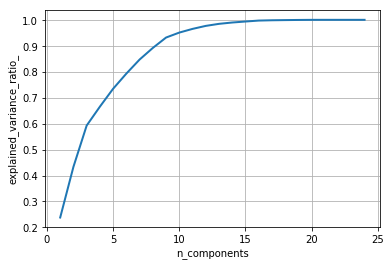

In [71]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_train_sc[all_columns])

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [72]:
pca.components_

array([[ 1.53698381e-01, -2.32618098e-02, -3.59806721e-03,
         5.13445718e-02, -5.59226101e-01,  5.00634052e-02,
        -3.30123655e-02, -6.62471575e-02,  6.08477053e-02,
        -0.00000000e+00,  5.27308550e-04, -5.22405895e-01,
        -5.31689517e-01, -4.22465858e-02, -3.44511958e-02,
        -1.21286527e-02, -2.90755326e-01, -2.53641726e-02,
        -4.84572738e-02, -4.98908259e-02, -0.00000000e+00,
        -4.63114187e-03, -1.99844270e-03, -1.24544497e-04],
       [ 8.56453802e-03,  5.20338116e-01, -5.74245572e-03,
         8.51262215e-03, -1.21323645e-02,  4.69968662e-03,
         6.94119872e-01, -1.76441778e-02,  7.16055069e-03,
         1.08420217e-19,  4.93391086e-01, -1.26727830e-02,
        -1.28141171e-02, -8.47841931e-03, -1.37344289e-02,
        -3.44137765e-02, -3.06099444e-02, -1.29484446e-03,
        -7.95520043e-03, -5.77397127e-03, -0.00000000e+00,
        -1.11225136e-02, -8.71533928e-03, -1.72004897e-02],
       [ 2.56991608e-03, -2.78148764e-02, -4.86967855e

In [73]:
pca.explained_variance_ratio_

array([2.38157763e-01, 1.95305586e-01, 1.59114743e-01, 7.28902086e-02,
       6.90266575e-02, 5.83656860e-02, 5.40923570e-02, 4.47963275e-02,
       4.00301420e-02, 1.91074431e-02, 1.42204673e-02, 1.15686299e-02,
       7.88627717e-03, 5.15100525e-03, 3.81595106e-03, 3.63318264e-03,
       1.19298436e-03, 6.38134762e-04, 5.60882395e-04, 4.11702255e-04,
       3.38689083e-05, 5.99846173e-32, 1.31775804e-34, 5.97406984e-43])